### FEATURE SCALING - D.C. Residential Properties 

Use the D.C. Residential Properties dataset (Links to an external site.)Links to an external site. from Kaggle to re-scale the "price" column using both z-score standardization and Min-max scaling.

HINTS: Replace or remove the missing values in the data.

Upload your notebook to your Github repository and submit the URL for this assignment.

In [1]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
df = pd.read_csv('DC_Properties.csv')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [3]:
#check if any missing values in the data
df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [4]:
df.isnull().sum()   ## Total missing values in each column 

Unnamed: 0                 0
BATHRM                     0
HF_BATHRM                  0
HEAT                       0
AC                         0
NUM_UNITS              52261
ROOMS                      0
BEDRM                      0
AYB                      271
YR_RMDL                78029
EYB                        0
STORIES                52305
SALEDATE               26770
PRICE                  60741
QUALIFIED                  0
SALE_NUM                   0
GBA                    52261
BLDG_NUM                   0
STYLE                  52261
STRUCT                 52261
GRADE                  52261
CNDTN                  52261
EXTWALL                52261
ROOF                   52261
INTWALL                52261
KITCHENS               52262
FIREPLACES                 0
USECODE                    0
LANDAREA                   0
GIS_LAST_MOD_DTTM          0
SOURCE                     0
CMPLX_NUM             106696
LIVING_GBA            106696
FULLADDRESS            52917
CITY          

In [5]:
  ## fill price column for missing values by mean
df['PRICE'].fillna(df['PRICE'].mean(), inplace=True)

In [6]:
#df['PRICE'].dropna(inplace=True)  ## fill price column for missing values by mean

In [7]:
df.isnull().sum()   ## Total missing values in each column 

Unnamed: 0                 0
BATHRM                     0
HF_BATHRM                  0
HEAT                       0
AC                         0
NUM_UNITS              52261
ROOMS                      0
BEDRM                      0
AYB                      271
YR_RMDL                78029
EYB                        0
STORIES                52305
SALEDATE               26770
PRICE                      0
QUALIFIED                  0
SALE_NUM                   0
GBA                    52261
BLDG_NUM                   0
STYLE                  52261
STRUCT                 52261
GRADE                  52261
CNDTN                  52261
EXTWALL                52261
ROOF                   52261
INTWALL                52261
KITCHENS               52262
FIREPLACES                 0
USECODE                    0
LANDAREA                   0
GIS_LAST_MOD_DTTM          0
SOURCE                     0
CMPLX_NUM             106696
LIVING_GBA            106696
FULLADDRESS            52917
CITY          

In [8]:
df2 = df[['BATHRM','HF_BATHRM','HEAT','ROOMS','PRICE','LANDAREA','SQUARE']]

In [10]:
df2.isnull().sum()

BATHRM       0
HF_BATHRM    0
HEAT         0
ROOMS        0
PRICE        0
LANDAREA     0
SQUARE       0
dtype: int64

In [13]:
df2.dtypes

BATHRM        int64
HF_BATHRM     int64
HEAT         object
ROOMS         int64
PRICE         int64
LANDAREA      int64
SQUARE       object
dtype: object

In [14]:
df2['PRICE'] = df2['PRICE'].apply(lambda x: int(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Z-score Standardization
Z-score standardization is the process of converting the data to have a mean of 0 and a standard deviation of 1. The z-score is calculcated by subtracting the mean for a feature (column) by each data point value and dividing by the standard deviation.

𝑧=(𝑣𝑎𝑙𝑢𝑒−𝑚𝑒𝑎𝑛)𝑠𝑡𝑑𝑑𝑒𝑣

In [18]:
#Method 1: manual calculation of z-scores for 'Glucose' column

#mean for the column
mean = df2['PRICE'].mean()

#standard deviation of the column
std = df2['PRICE'].std()

#each value in column minus the mean and then divide by the standard deviation
PRICE_z_manual = (df2['PRICE'] - mean)/std



In [19]:
#values for mean and standard deviation of 'Glucose column'
mean, std

(931351.3675962682, 5550558.004606641)

In [25]:
#first 5 rows of z-score standardized 'Glucose' column
PRICE_z_manual.head()

0    2.948328e-02
1   -6.622690e-08
2    2.105462e-01
3    1.208254e-01
4   -6.622690e-08
Name: PRICE, dtype: float64

###  Method 2: use scikit-learn to calculate z-scores

In [35]:
df3 = df2[['PRICE']]

In [36]:
#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()

#fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed
#'Glucose' is in double set of square brackets in order to make it a dataframe
PRICE_zscore = scaler.fit_transform(df3[['PRICE']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [37]:
#mean and standard deviation of z-score standardized 'Glucose' column
PRICE_zscore.mean(), PRICE_zscore.std()

(-1.6092112009765917e-18, 1.0)

In [38]:
#because fit_transform made an array, we have to change it back into a Series type (pandas dataframe column)
PRICE_z_col = pd.Series(PRICE_zscore.reshape(-1))

In [39]:
#first 5 rows of z-score standardized glucose column
PRICE_z_col.head()

0    2.948337e-02
1   -6.622711e-08
2    2.105468e-01
3    1.208258e-01
4   -6.622711e-08
dtype: float64

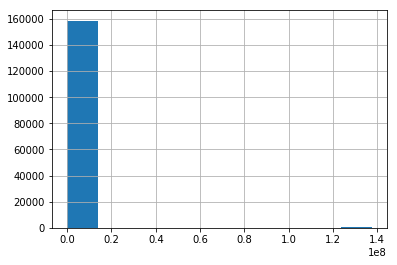

In [40]:
#BEFORE: frequency count plot of 'Glucose' column
df3['PRICE'].hist()

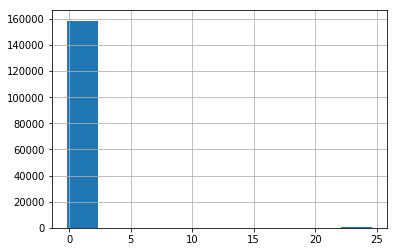

In [41]:
#AFTER: frequency count plot of 'Glucose' column (z-score standardization)
#range is much smaller
PRICE_z_col.hist()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019D233E2860>]],
      dtype=object)

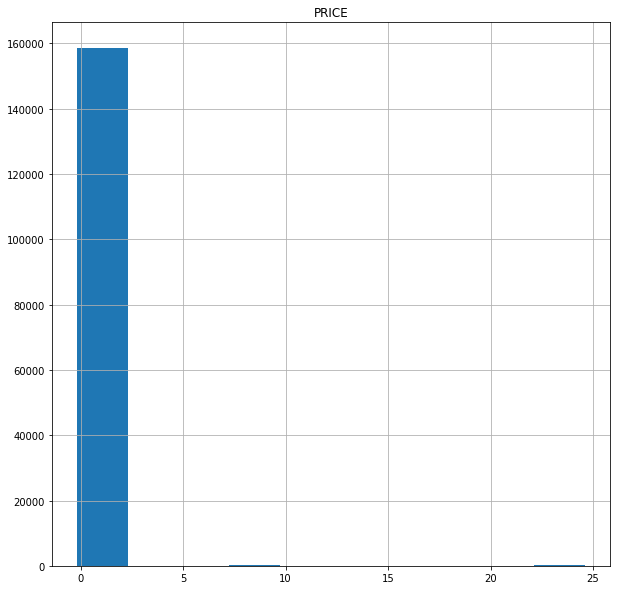

In [42]:
#show z-score standardization for all columns

#list to hold column names
colnames = list(df3.columns)

#calculate z-scores
zscore_df = pd.DataFrame(scaler.fit_transform(df3), columns = colnames)

#plot frequency distribution with same scale range
zscore_df.hist(figsize=(10,10), sharex=True)

Min-max Scaling
Max-min scaling transforms the data into a range from 0 to 1. The new minimum value of the column will always be 0 and the new maximum value of the column will always be 1. The values in between are calculated by using the original value and subtracting the column's minimum value, then dividing by the maximum value of the column minus the minimum value.

  ###   𝑚 = (𝑣𝑎𝑙𝑢𝑒−𝑚𝑖𝑛)𝑚𝑎𝑥−𝑚𝑖𝑛

In [46]:
#MinMaxScaler function will calculate the formula
minmax_sc = MinMaxScaler()

In [47]:
#use MinMaxScaler function and fit_transform function on the 'Glucose' column
Price_minmax = minmax_sc.fit_transform(df3[['PRICE']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [48]:
#mean and standard deviation of Min-Max 'Glucose' column
Price_minmax.mean(), Price_minmax.std()

(0.0067770283924761705, 0.04038885061696733)

In [49]:
convert array into a dataframe column
#look at first 5 rows of min-max values
glu_mm_col = pd.Series(Price_minmax.reshape(-1))
glu_mm_col.head()

SyntaxError: invalid syntax (<ipython-input-49-3d4981cf304a>, line 1)